<h1 style="color: rgb(0, 133, 202);">Outliers</h1>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

<h2 style="color: rgb(0, 133, 202);">The Morley Dataset</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 14, 10

In [2]:
#read in the dataset from a csv file located online. Converts to a Dataframe.
df = pd.read_csv("https://r-data.pmagunia.com/system/files/datasets/dataset-77488.csv")
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Expt,Run,Speed
0,1,1,850
1,1,2,740
2,1,3,900
3,1,4,1070
4,1,5,930


In [3]:
exptOne = df.loc[df['Expt']==1]
exptTwo = df.loc[df['Expt']==2]
exptThree = df.loc[df['Expt']==3]
exptFour = df.loc[df['Expt']==4]
exptFive = df.loc[df['Expt']==5]

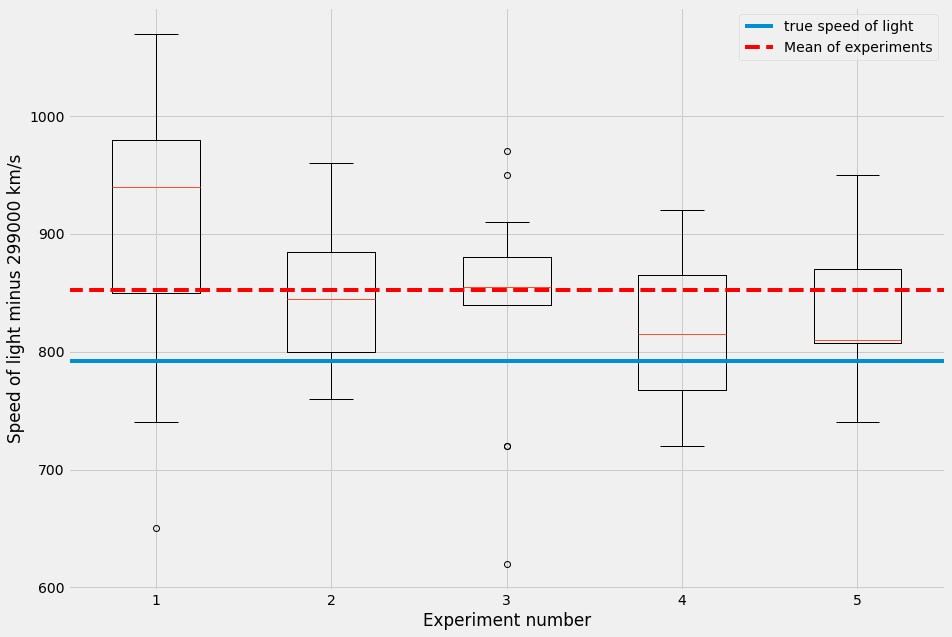

In [4]:
plt.boxplot(np.array([exptOne['Speed'], exptTwo['Speed'], exptThree['Speed'], exptFour['Speed'], exptFive['Speed']]).T)
plt.axhline(792.458, label = 'true speed of light')
plt.axhline(df['Speed'].mean(), color = 'r', label = 'Mean of experiments', ls = '--')
plt.xlabel(xlabel = 'Experiment number')
plt.ylabel(ylabel = 'Speed of light minus 299000 km/s')
plt.legend();

<h2 style="color: rgb(0, 133, 202);">The Iris Dataset</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

In [5]:
#loads the iris dataset as sklearn bunch. as_frame generates a pandas Dataframe containing the data
iris = datasets.load_iris(as_frame=True)

In [6]:
print(type(iris.frame))
iris.frame.head()

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [8]:
attr = iris.feature_names
attr

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

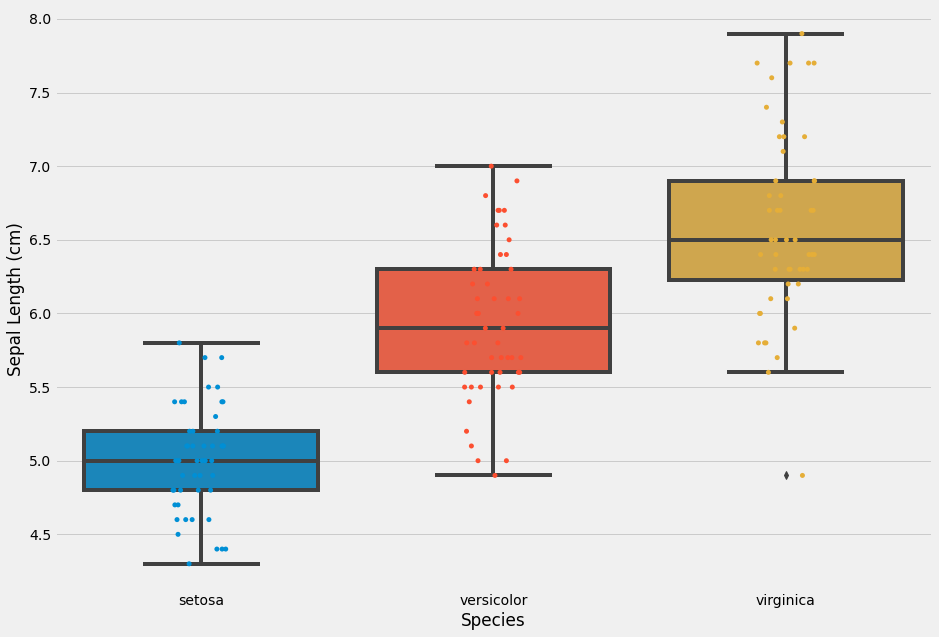

In [9]:
ax = sns.boxplot(x='target',y='sepal length (cm)',data=iris.frame)
ax=sns.stripplot(x='target',y='sepal length (cm)',data=iris.frame,jitter=True,edgecolor='gray')
ax.set(xlabel='Species', ylabel='Sepal Length (cm)')
ax.set_xticklabels(iris.target_names)

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

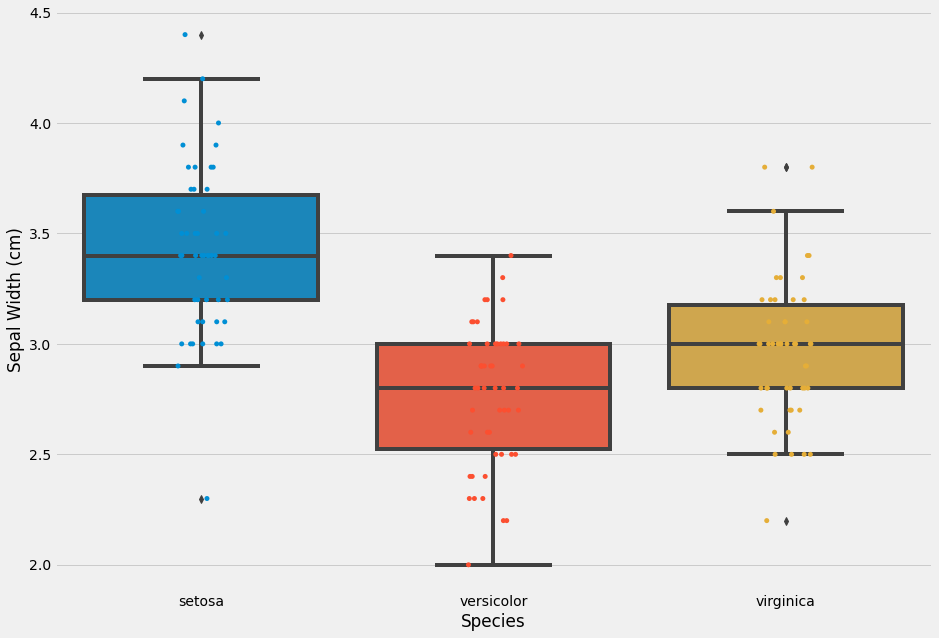

In [10]:
ax = sns.boxplot(x='target',y='sepal width (cm)',data=iris.frame)
ax=sns.stripplot(x='target',y='sepal width (cm)',data=iris.frame,jitter=True,edgecolor='gray')
ax.set(xlabel='Species', ylabel='Sepal Width (cm)')
ax.set_xticklabels(iris.target_names)

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

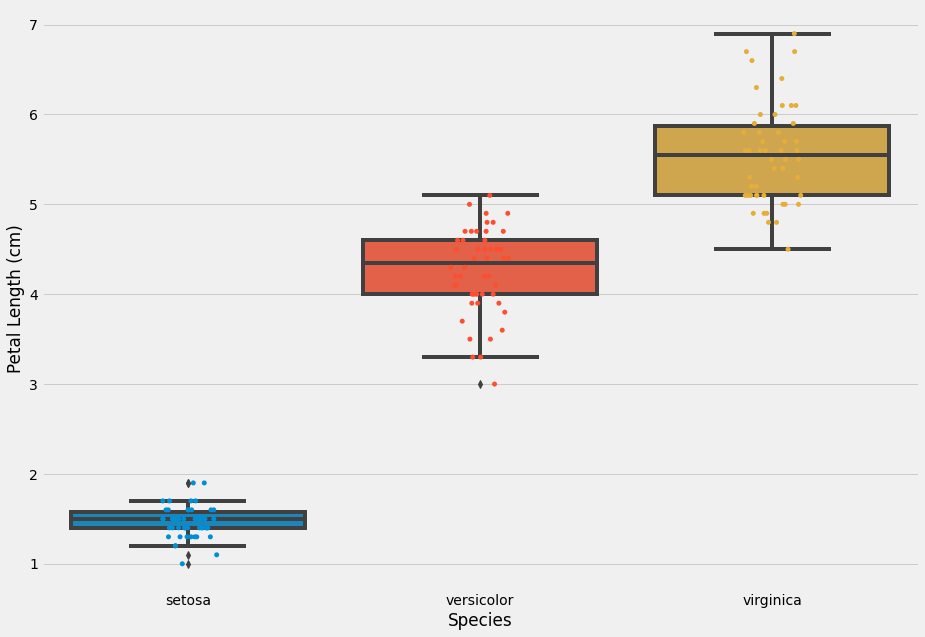

In [11]:
ax = sns.boxplot(x='target',y='petal length (cm)',data=iris.frame)
ax=sns.stripplot(x='target',y='petal length (cm)',data=iris.frame,jitter=True,edgecolor='gray')
ax.set(xlabel='Species', ylabel='Petal Length (cm)')
ax.set_xticklabels(iris.target_names)

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

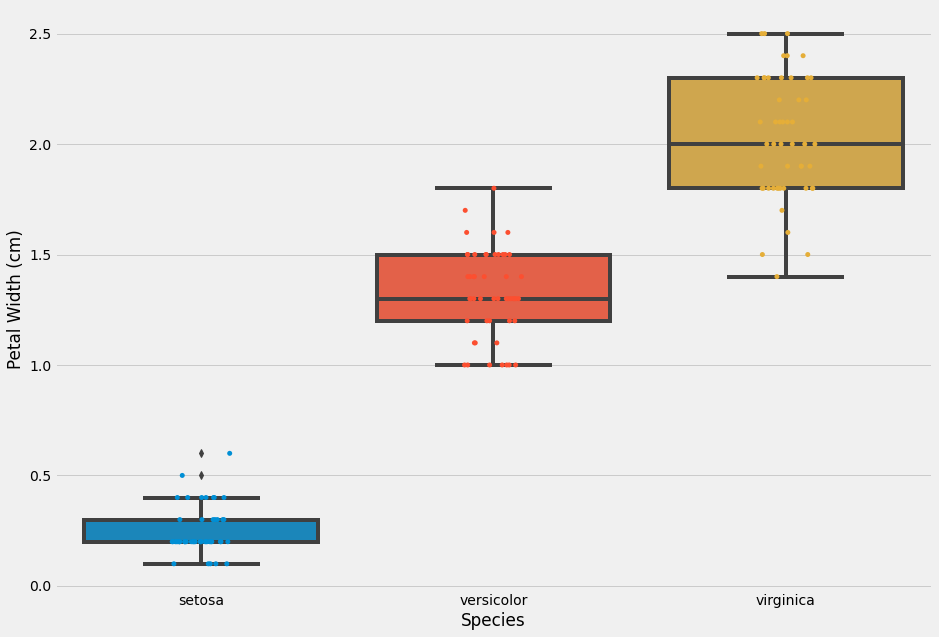

In [12]:
ax = sns.boxplot(x='target',y='petal width (cm)',data=iris.frame)
ax=sns.stripplot(x='target',y='petal width (cm)',data=iris.frame,jitter=True,edgecolor='gray')
ax.set(xlabel='Species', ylabel='Petal Width (cm)')
ax.set_xticklabels(iris.target_names)

<h2 style="color: rgb(0, 133, 202);">Inversely Proportional</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

In [13]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

In [14]:
# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

In [15]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

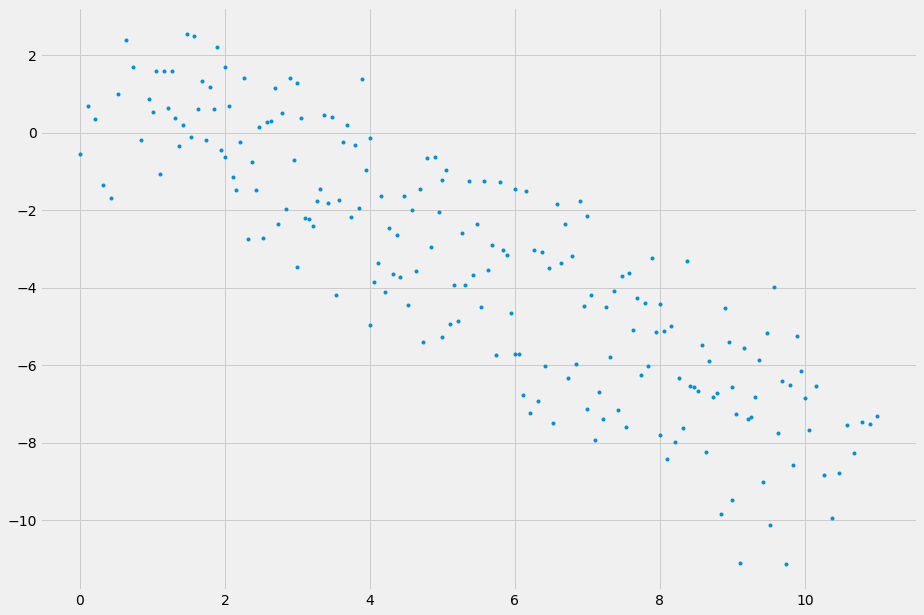

In [16]:
# Plot.
plt.plot(x, -y, '.');

In [17]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, -y, 1)

In [18]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

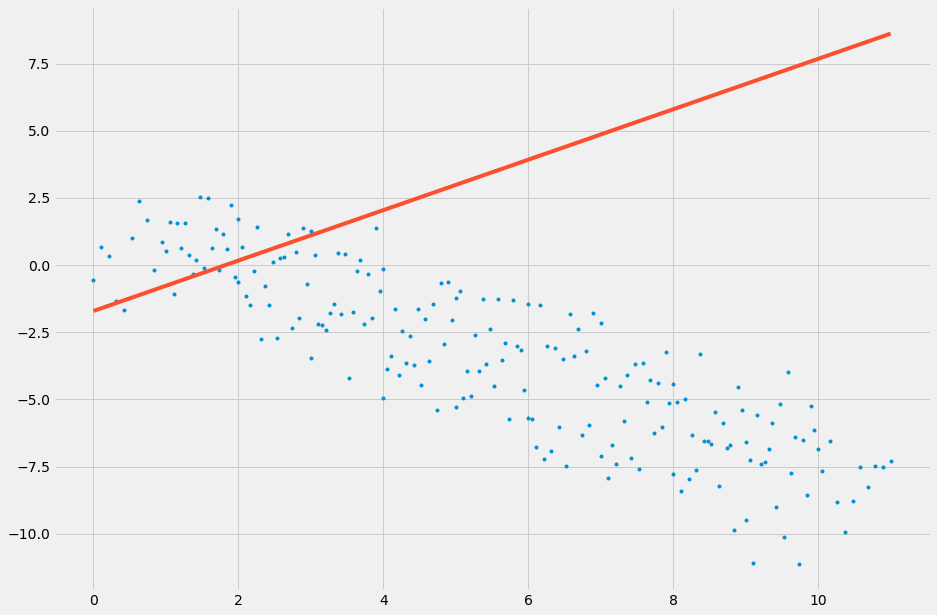

In [19]:
# Plot points.
plt.plot(x, -y, '.')

# Plot line.
plt.plot(xbestfit, -ybestfit);

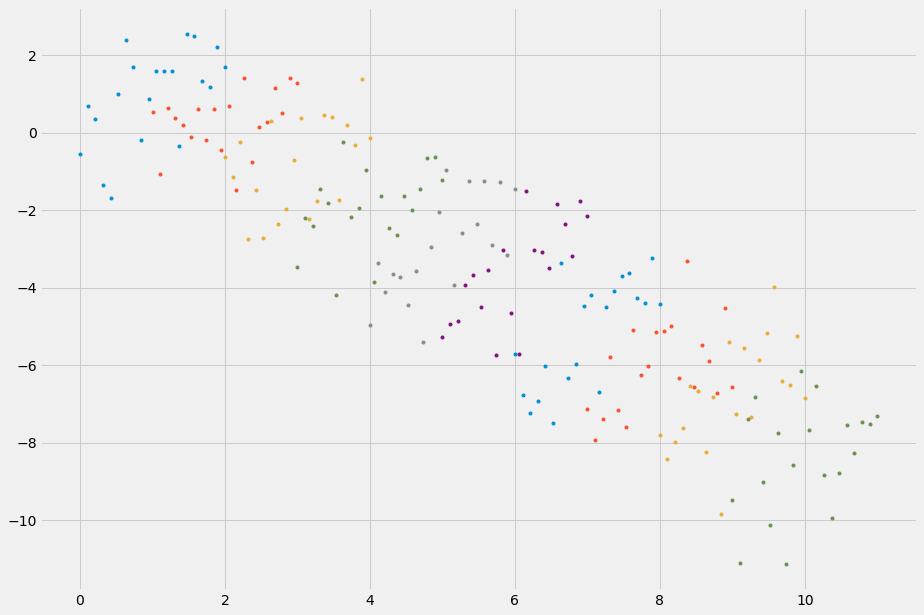

In [20]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], -ys[i], '.')

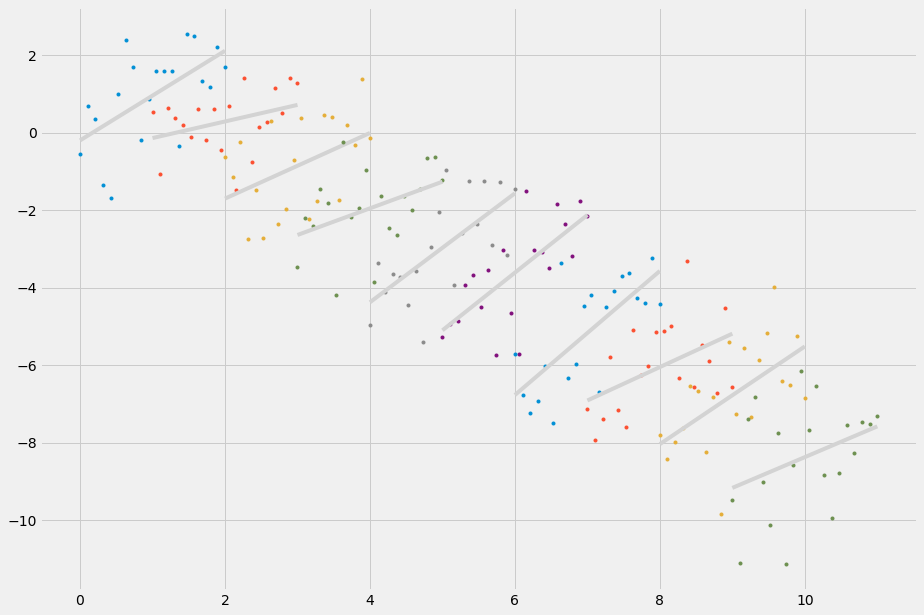

In [21]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], -ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], -ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

<h2 style="color: rgb(0, 133, 202);">Detecting outliers with sklearn</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

In [38]:
setosaPredictions = IsolationForest().fit(iris.frame[0:50]).predict(iris.frame[0:50])
print('Setosa outlier predictions')
print(setosaPredictions)

virginicaPredictions = IsolationForest().fit(iris.frame[50:100]).predict(iris.frame[50:100])
print('Virginica outlier predictions')
print(virginicaPredictions)

versicolorPredictions = IsolationForest().fit(iris.frame[100:150]).predict(iris.frame[100:150])
print('Versicolor outlier predictions')
print(versicolorPredictions)

Predictions
[ 1  1  1  1  1 -1 -1]
Setosa outlier predictions
[ 1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1
  1  1]
Virginica outlier predictions
[-1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1  1 -1  1
  1  1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1
 -1  1]
Versicolor outlier predictions
[-1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1  1
  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]


In [42]:
versicoloreePredictions = EllipticEnvelope().fit(iris.frame[100:150]).predict(iris.frame[100:150])
print('Versicolor outlier predictions')
print(versicoloreePredictions)

Versicolor outlier predictions
[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]


In [45]:
versicolorKNpredictions = LocalOutlierFactor(n_neighbors=5, novelty=True).fit(iris.frame[100:150]).predict(iris.frame[100:150])
print('Versicolor outlier predictions')
print(versicolorKNpredictions)

Versicolor outlier predictions
[ 1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]
